# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [44]:
data.shape

(5391, 6)

In [45]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [46]:
print(data.isna().values.any())
print("-----------------------------------")
print(data.isnull().values.any())
print("-----------------------------------")
print(data.isna().values.sum())

False
-----------------------------------
False
-----------------------------------
0


In [47]:
print(data.duplicated().sum())
print(data.duplicated().values.any())

0
False


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [49]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [50]:
data.head(15)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000
6,4630,1927-12-08,Wings,2000000,0,0
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000
8,4240,1930-01-01,Hell's Angels,4000000,0,0
9,5043,1931-12-31,Mata Hari,558000,900000,900000


In [51]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace("$", "").str.replace(",", "")
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace("$", "").str.replace(",", "")
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace("$", "").str.replace(",", "")
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
print(data.dtypes)
print("------------------------------------")
data.head(15)

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object
------------------------------------


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000
6,4630,1927-12-08,Wings,2000000,0,0
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000
8,4240,1930-01-01,Hell's Angels,4000000,0,0
9,5043,1931-12-31,Mata Hari,558000,900000,900000


In [52]:
chars_to_remove = ["$", ","]
columns_to_convert = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for column in columns_to_convert:
  for char in chars_to_remove:
    data[column] = data[column].astype(str).str.replace(char, "")
  data[column] = pd.to_numeric(data[column])

data.sample(15)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1922,358,2002-11-27,Treasure Planet,100000000,91800000,38120554
2571,597,2005-12-23,Munich,75000000,131492772,47379090
4038,227,2011-11-18,"The Twilight Saga: Breaking Dawn, Part 1",127500000,689420051,281287133
5163,3416,2016-03-30,Everybody Wants Some,10000000,5437126,3400278
2596,1316,2006-01-27,Big Momma's House 2,40000000,137047376,70165972
428,2890,1985-12-18,Brazil,15000000,9930649,9929135
2565,2909,2005-12-14,Los tres entierros de Melquiades Estrada,15000000,13454474,5027684
1159,2149,1998-11-09,Without Limits,25000000,780326,780326
4780,5138,2014-12-31,Pancakes,400000,0,0
1136,4769,1998-09-10,Festen,1300000,1647780,1647780


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [53]:
data.Release_Date = pd.to_datetime(data.Release_Date)
print(data.dtypes)
print("------------------------------------")
data.head(15)

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object
------------------------------------


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000
6,4630,1927-12-08,Wings,2000000,0,0
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000
8,4240,1930-01-01,Hell's Angels,4000000,0,0
9,5043,1931-12-31,Mata Hari,558000,900000,900000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [54]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [55]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [56]:
data[data.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [57]:
data.USD_Production_Budget.mean()

31113737.57837136

In [58]:
data.USD_Worldwide_Gross.mean()

88855421.96271564

In [59]:
print(data.USD_Domestic_Gross.min())
print(data.USD_Worldwide_Gross.min())

0
0


In [60]:
zeros_domestic = data[data["USD_Domestic_Gross"] == 0]
print(zeros_domestic.shape)
print(f"Number of films with no domestic revenue: {len(zeros_domestic)}")
zeros_domestic.sort_values("USD_Production_Budget", ascending=False)

(512, 6)
Number of films with no domestic revenue: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [61]:
zeros_worldwide = data[data["USD_Worldwide_Gross"] == 0]
print(zeros_worldwide.shape)
print(f"Number of films with no worldwide revenue: {len(zeros_worldwide)}")
zeros_worldwide.sort_values("USD_Production_Budget", ascending=False)

(357, 6)
Number of films with no worldwide revenue: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [62]:
zeros_domestic = data[data["USD_Domestic_Gross"] == 0]
print(zeros_domestic.shape)
print(f"Number of films with no domestic revenue: {len(zeros_domestic)}")
zeros_domestic.sort_values("USD_Production_Budget", ascending=False)

(512, 6)
Number of films with no domestic revenue: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [63]:
zeros_worldwide = data[data["USD_Worldwide_Gross"] == 0]
print(zeros_worldwide.shape)
print(f"Number of films with no worldwide revenue: {len(zeros_worldwide)}")
zeros_worldwide.sort_values("USD_Production_Budget", ascending=False)

(357, 6)
Number of films with no worldwide revenue: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [64]:
international_releases = data.loc[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
print(f"Number of films released international: {len(international_releases)}")
international_releases

Number of films released international: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [65]:
bool_list1 = [True, True, False, False]
bool_list2 = [False, True, True, False]
np.array(bool_list1) & np.array(bool_list2)

array([False,  True, False, False])

In [66]:
international_releases2 = data.query("USD_Worldwide_Gross != 0 & USD_Domestic_Gross == 0")
print(f"Number of international releases: {len(international_releases2)}")
international_releases2

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [67]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
unreleased_films = data[data.Release_Date >= scrape_date]
print(f"Number of unreleased films: {len(unreleased_films)}")
unreleased_films

Number of unreleased films: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [68]:
scrape_date = pd.Timestamp('2018-5-1')
unreleased_films2 = data.loc[data.Release_Date >= scrape_date]
print(f"Unreleased films: {len(unreleased_films2)}")
unreleased_films2

Unreleased films: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [69]:
data_clean = data.drop(unreleased_films.index)
print(data_clean.shape)
print(f"{len(data) - len(data_clean)}")

(5384, 6)
7


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [70]:
over_budget_films = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(f"Number of films that lost money: {len(over_budget_films)}")
over_budget_films.sample(20)

Number of films that lost money: 2007


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2111,3651,2003-10-24,The Singing Detective,8000000,524747,336456
5029,4505,2015-10-13,8 Days,2500000,0,0
2295,1805,2004-09-17,Mr. 3000,30000000,21827296,21800302
3139,2224,2008-04-25,Rogue,23000000,4673377,10452
848,1392,1996-02-16,City Hall,40000000,20278055,20278055
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
576,3752,1990-09-28,Dark Angel,7000000,4372561,4372561
2439,4486,2005-05-27,Saving Face,2500000,1269705,1187266
5035,4679,2015-10-20,Beginners Guide to Sex,1800000,0,0
4573,3395,2014-03-14,Bad Words,10000000,7843145,7779614


In [71]:
over_budget_films2 = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(f"Number of films that lost money: {len(over_budget_films2)}")
over_budget_films2.sample(5)

Number of films that lost money: 2007


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3586,3463,2010-02-19,Blood Done Sign My Name,10000000,109383,109383
3525,959,2009-12-06,Imagine That,55000000,16123323,16123323
1946,3886,2002-12-20,Morvern Callar,6000000,267194,267194
1693,682,2001-10-08,Osmosis Jones,70000000,13596911,13596911
2963,4497,2007-08-24,Eye of the Dolphin,2500000,72260,72210


In [72]:
over_budget_films3 = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross")
print(f"Number of films that lost money: {len(over_budget_films3)}")
over_budget_films2.sample(5)

Number of films that lost money: 2007


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2948,3748,2007-07-27,Who's Your Caddy?,7000000,5694308,5694308
4578,1998,2014-03-21,Blood Ties,26000000,2923959,42472
2000,473,2003-03-28,The Core,85000000,74132631,31111260
4710,4887,2014-10-24,23 Blast,1000000,549185,549185
585,5101,1990-12-31,Going Under,500000,0,0


In [73]:
percent = len(over_budget_films) / len(data_clean) * 100
print(percent)
print(f"Films that lost money from dataset: {'{:,.2f}'.format(percent)} percent")

37.27711738484398
Films that lost money from dataset: 37.28 percent


In [74]:
print(f"Films that lost money from dataset: {'{:,.2f}'.format(over_budget_films3.shape[0] / data_clean.shape[0] * 100)} %")

Films that lost money from dataset: 37.28 %


# Seaborn for Data Viz: Bubble Charts

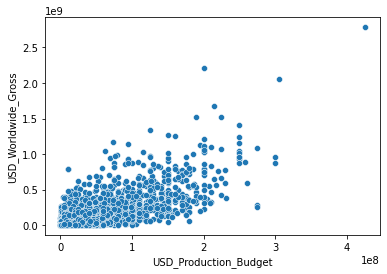

In [75]:
sns.scatterplot(data = data_clean,
                x = "USD_Production_Budget",
                y = "USD_Worldwide_Gross")

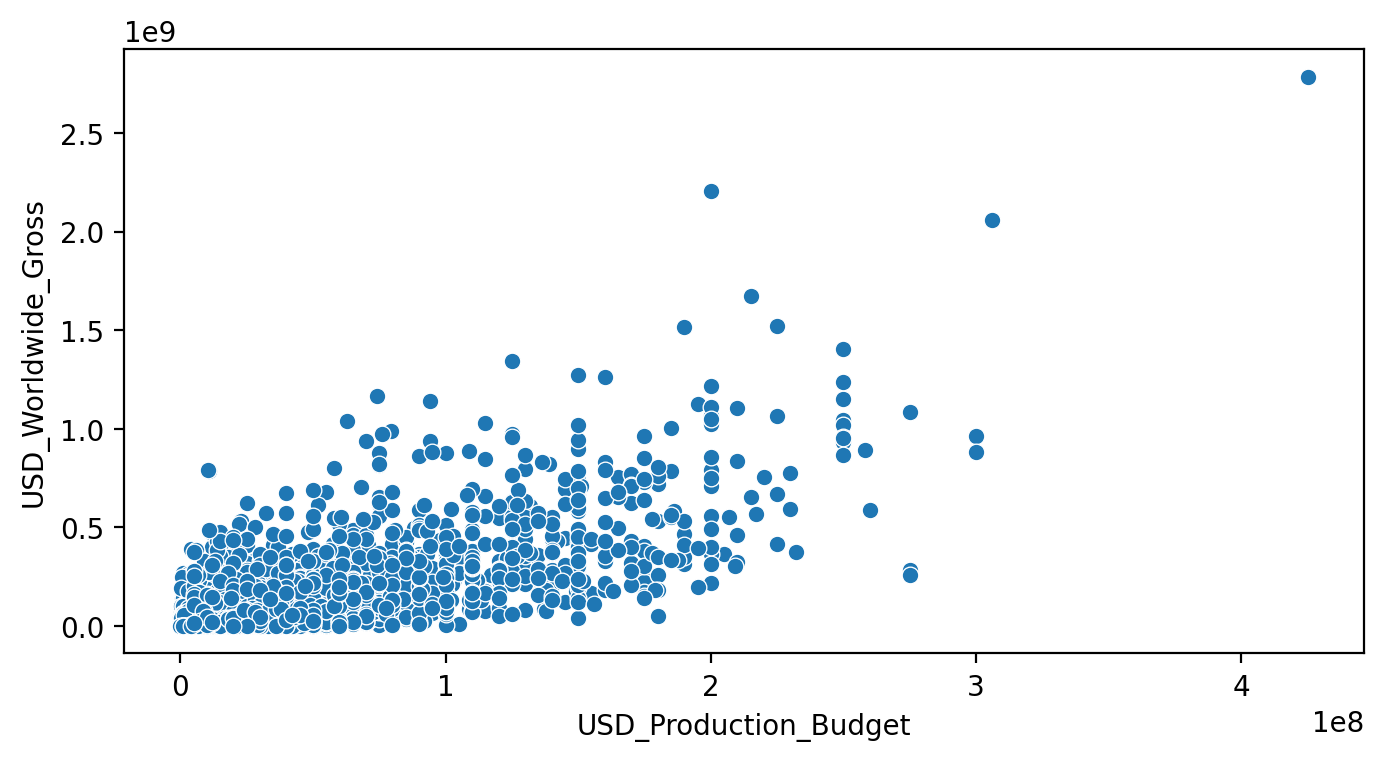

In [76]:
plt.figure(figsize=(8, 4), dpi=200)

sns.scatterplot(data = data_clean,
                x = "USD_Production_Budget",
                y = "USD_Worldwide_Gross")

plt.show()

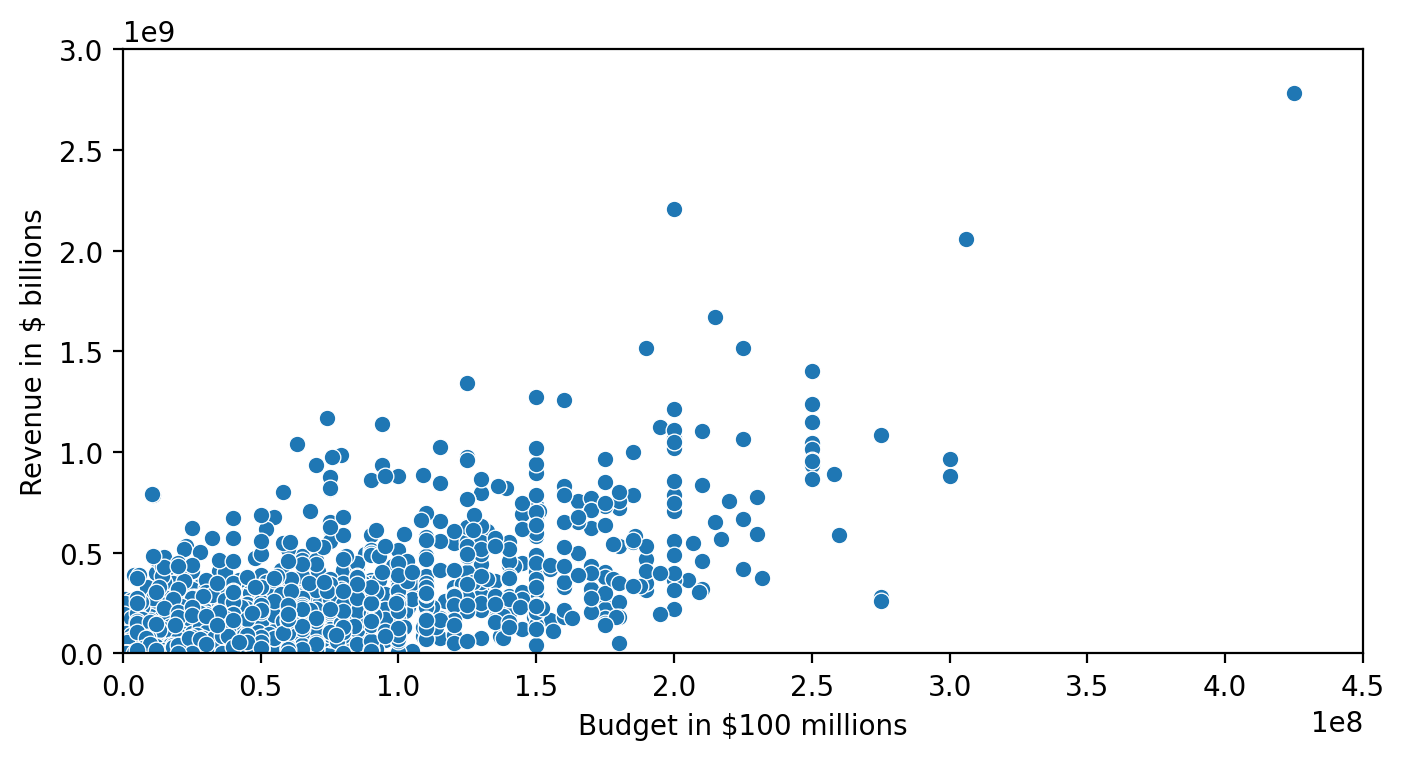

In [77]:
plt.figure(figsize=(8, 4), dpi=200)

ax = sns.scatterplot(data = data_clean,
                x = "USD_Production_Budget",
                y = "USD_Worldwide_Gross")

ax.set(ylim = (0, 3000000000),
       xlim = (0, 450000000),
       ylabel = "Revenue in $ billions",
       xlabel = "Budget in $100 millions")

plt.show()

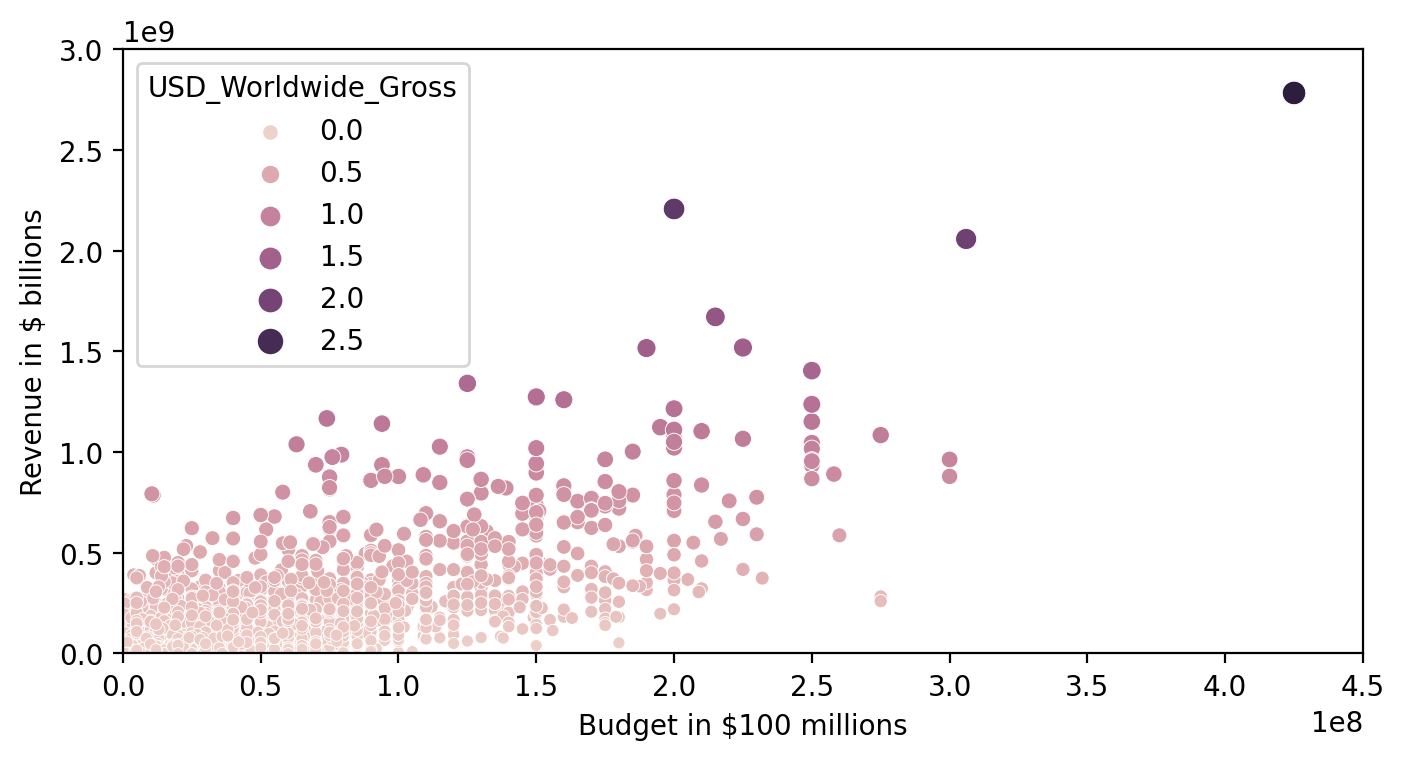

In [78]:
plt.figure(figsize=(8, 4), dpi=200)

ax = sns.scatterplot(data = data_clean,
                x = "USD_Production_Budget",
                y = "USD_Worldwide_Gross",
                hue = "USD_Worldwide_Gross",
                size = "USD_Worldwide_Gross")

ax.set(ylim = (0, 3000000000),
       xlim = (0, 450000000),
       ylabel = "Revenue in $ billions",
       xlabel = "Budget in $100 millions")

plt.show()

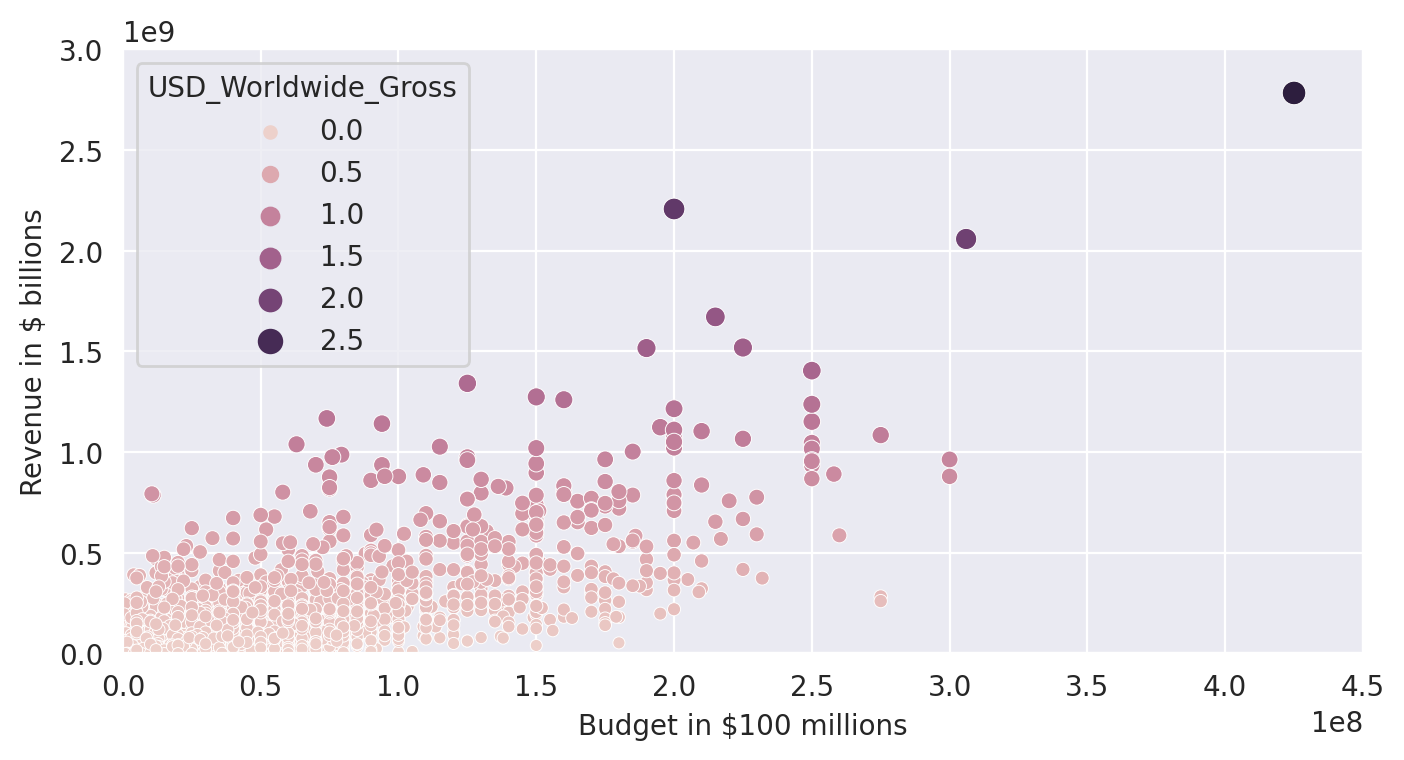

In [79]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.scatterplot(data = data_clean,
                  x = "USD_Production_Budget",
                  y = "USD_Worldwide_Gross",
                  hue = "USD_Worldwide_Gross",
                  size = "USD_Worldwide_Gross")

  ax.set(ylim = (0, 3000000000),
        xlim = (0, 450000000),
        ylabel = "Revenue in $ billions",
        xlabel = "Budget in $100 millions")

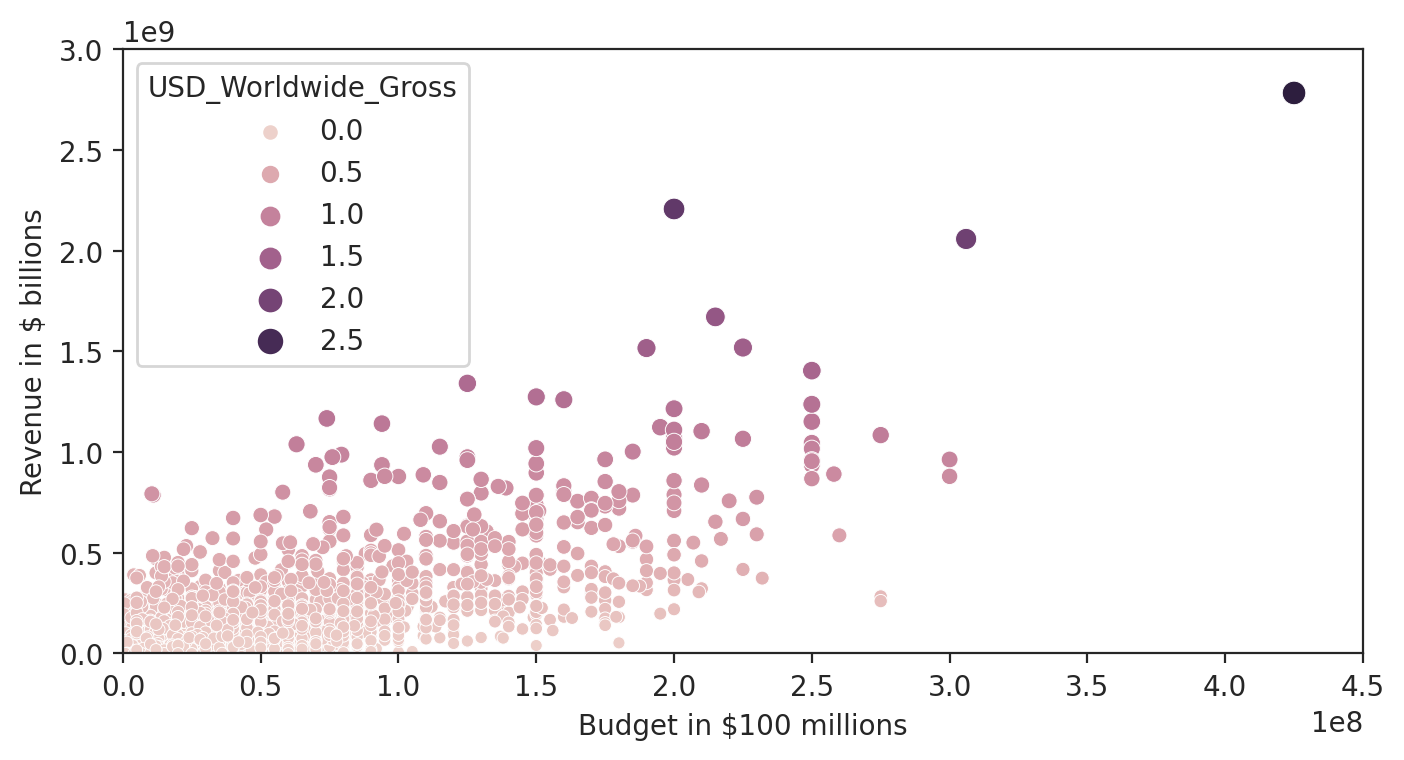

In [80]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("ticks"):
  ax = sns.scatterplot(data = data_clean,
                  x = "USD_Production_Budget",
                  y = "USD_Worldwide_Gross",
                  hue = "USD_Worldwide_Gross",
                  size = "USD_Worldwide_Gross")

  ax.set(ylim = (0, 3000000000),
        xlim = (0, 450000000),
        ylabel = "Revenue in $ billions",
        xlabel = "Budget in $100 millions")

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [81]:
data_clean.sort_values("Release_Date", ascending=True)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5377,489,2017-10-02,The Lego Batman Movie,80000000,310940997,175750384
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


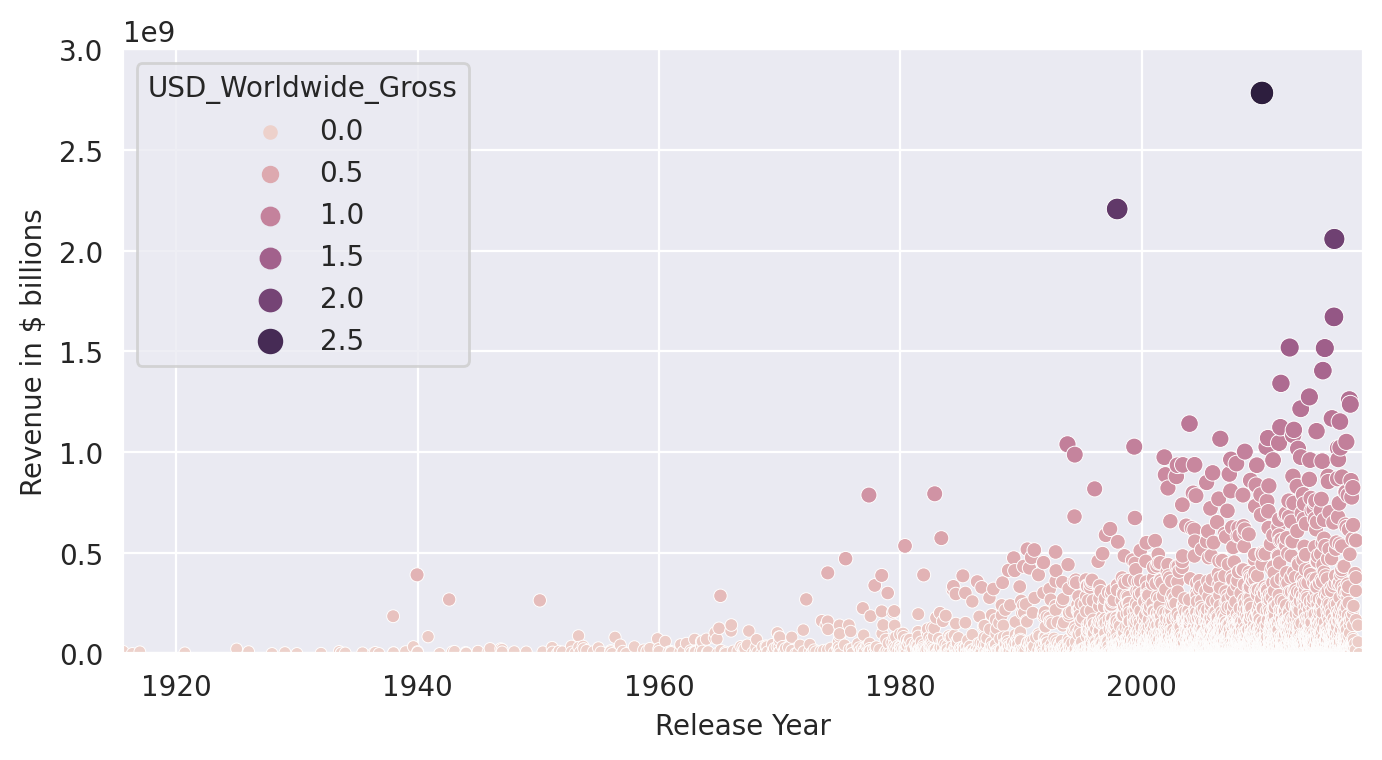

In [82]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.scatterplot(data = data_clean,
                  x = "Release_Date",
                  y = "USD_Worldwide_Gross",
                  hue = "USD_Worldwide_Gross",
                  size = "USD_Worldwide_Gross")

  ax.set(ylim = (0, 3000000000),
         xlim = (pd.Timestamp("1915-8-1"), pd.Timestamp("2018-5-1")),
         ylabel = "Revenue in $ billions",
         xlabel = "Release Year")

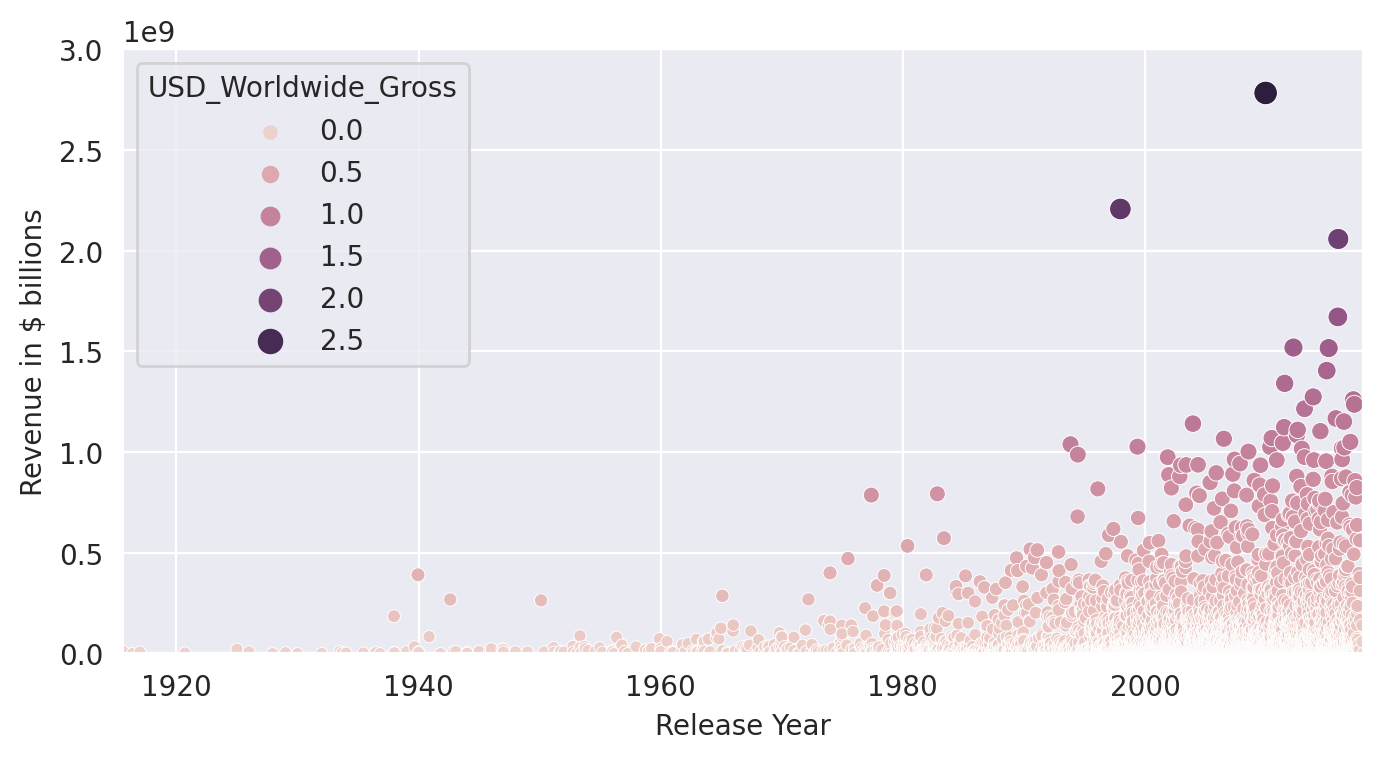

In [83]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.scatterplot(data = data_clean,
                  x = "Release_Date",
                  y = "USD_Worldwide_Gross",
                  hue = "USD_Worldwide_Gross",
                  size = "USD_Worldwide_Gross")

  ax.set(ylim = (0, 3000000000),
         xlim = (data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         ylabel = "Revenue in $ billions",
         xlabel = "Release Year")

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [84]:
datetime_index = pd.Series([index.year for index in data_clean.Release_Date])
datetime_index

0       1915
1       1916
2       1916
3       1920
4       1925
        ... 
5379    2017
5380    2017
5381    2017
5382    2017
5383    2017
Length: 5384, dtype: int64

In [85]:
datetime_index2 = pd.DatetimeIndex(data_clean.Release_Date)
print(datetime_index2)
print("-----------------------------------------------")
datetime_index_year_only = datetime_index2.year
datetime_index_year_only

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)
-----------------------------------------------


Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [86]:
decade = (datetime_index_year_only // 10) * 10
decade

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)

In [87]:
data_clean["Decade"] = decade
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [88]:
old_films = data_clean.loc[data_clean.Decade < 1970]
print(f"Number of films released before 1970: {len(old_films)}")
print(f"Most expensive films released before 1970 is {old_films.iloc[old_films.USD_Production_Budget.idxmax()].Movie_Title} with ${'{:,.2f}'.format(old_films.USD_Production_Budget.max())} budget.")
old_films

Number of films released before 1970: 153
Most expensive films released before 1970 is Cleopatra with $42,000,000.00 budget.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960


In [89]:
new_films = data_clean.loc[data_clean.Decade >= 1970]
print(f"Number of films released 1970 and up: {len(new_films)}")
print(f"Most expensive films released from 1970 and up is {new_films.iloc[new_films.USD_Production_Budget.idxmax()].Movie_Title} with ${'{:,.2f}'.format(new_films.USD_Production_Budget.max())} budget.")
new_films

Number of films released 1970 and up: 5231
Most expensive films released from 1970 and up is Iron Man 2 with $425,000,000.00 budget.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


# Seaborn Regression Plots

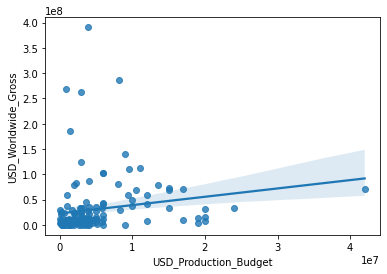

In [90]:
sns.regplot(data = old_films,
            x = "USD_Production_Budget",
            y = "USD_Worldwide_Gross")

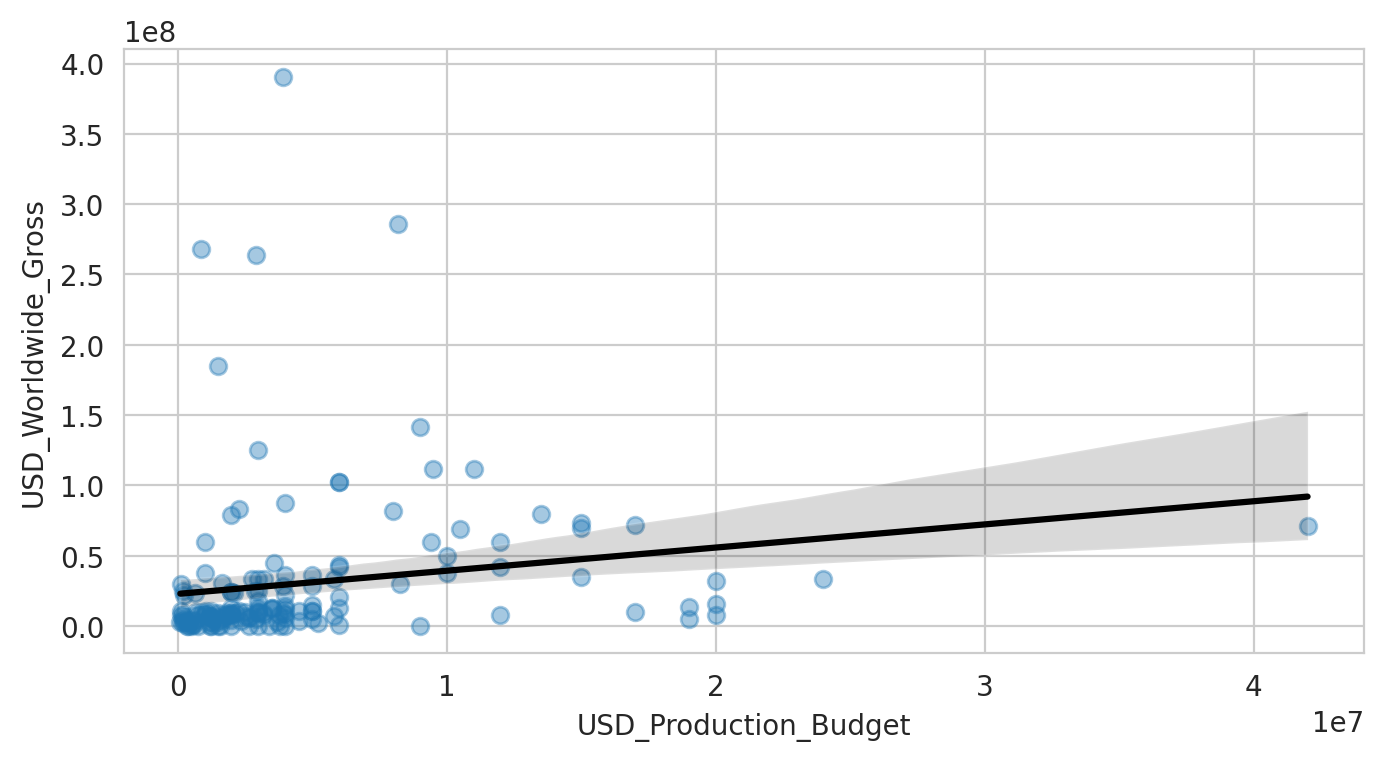

In [92]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data = old_films,
            x = "USD_Production_Budget",
            y = "USD_Worldwide_Gross",
            scatter_kws = {"alpha": 0.4},
            line_kws = {"color": "black"})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

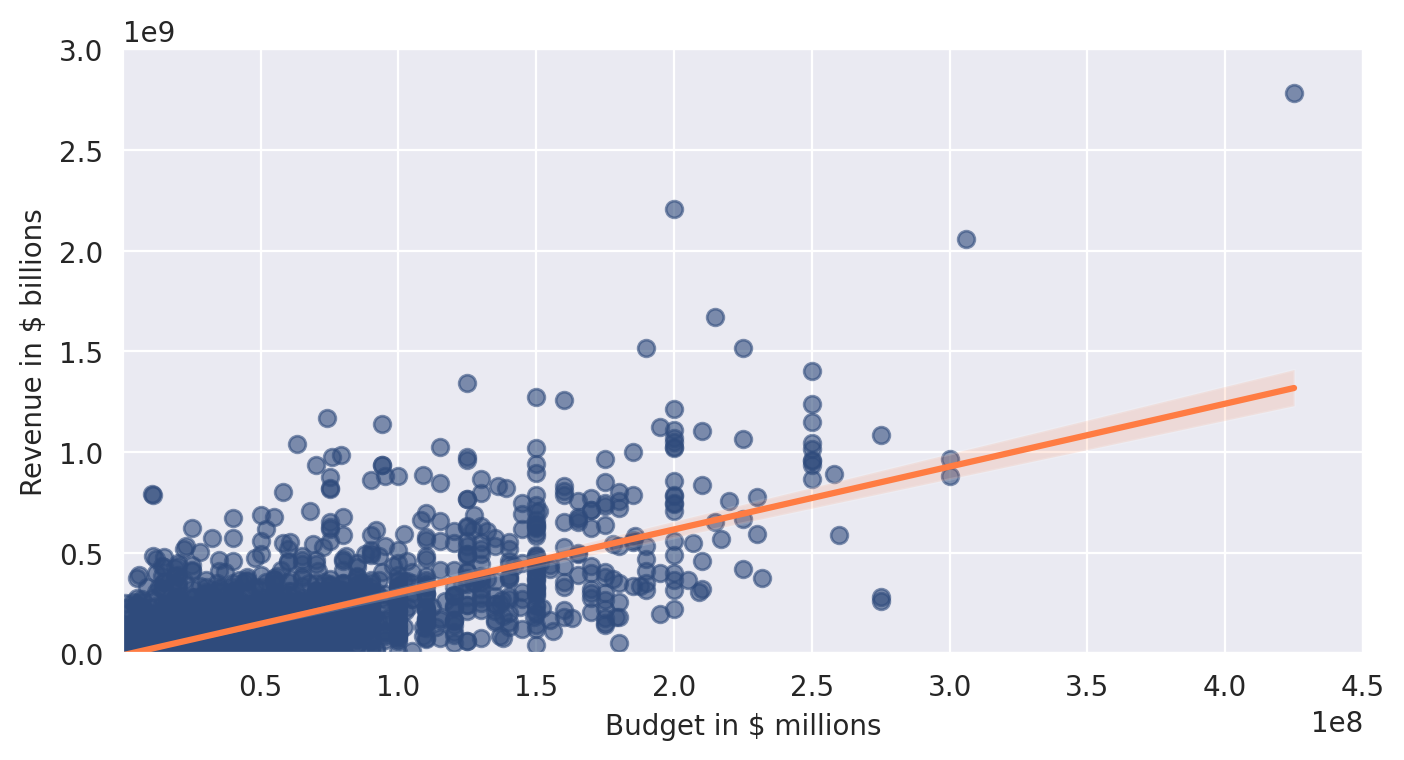

In [100]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data = new_films,
              x = "USD_Production_Budget",
              y = "USD_Worldwide_Gross",
              scatter_kws = {"color": "#2f4b7c", "alpha": 0.6},
              line_kws = {"color": "#ff7c43"})
  
  ax.set(
      ylim = (new_films.USD_Worldwide_Gross.min(), 3000000000),
      xlim = (new_films.USD_Production_Budget.min(), 450000000),
      # ylim = (new_films.USD_Worldwide_Gross.min(), new_films.USD_Worldwide_Gross.max()),
      # xlim = (new_films.USD_Production_Budget.min(), new_films.USD_Production_Budget.max()),
      ylabel = "Revenue in $ billions",
      xlabel = "Budget in $ millions"
      )

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [102]:
regression = LinearRegression()

In [103]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

Our `LinearRegression` does not like receiving Pandas Series (e.g., `new_films.USD_Production_Budget`), so I've created some new DataFrames here

In [104]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [106]:
# Theta one
regression.coef_

array([[3.12259592]])

In [108]:
# R-squared
regression.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [109]:
regression_old = LinearRegression()

In [110]:
# Explanatory Variable(s) or Feature(s)
X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [111]:
# Find the best-fit line
regression_old.fit(X_old, y_old)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
# Theta zero
regression_old.intercept_
print(f"The intercept is: {'{:,.2f}'.format(regression_old.intercept_[0])}")

The intercept is: 22,821,538.64


In [128]:
# Theta one
regression_old.coef_
print(f"The slope coefficient is: {'{:,.2f}'.format(regression_old.coef_[0][0])}")

The slope coefficient is: 1.65


In [132]:
# R-squared
regression_old.score(X_old, y_old)
print(f"The r-squared is : {'{:,.2f}'.format((regression_old.score(X_old, y_old) * 100))} %")

The r-squared is : 2.94 %


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [133]:
# revenue using the new_films model
# revenue = theta_zero + theta_one * budget
revenue_model_new_films = regression.intercept_[0] + regression.coef_[0][0] * 350000000
print(f"The estimated revenue for $350 millions budget film using new_films model is : {'{:,.2f}'.format(revenue_model_new_films)}")

The estimated revenue for $350 millions budget film using new_films model is : 1,084,257,803.06


In [135]:
# revenue using the old_films model
# revenue = theta_zero + theta_one * budget
revenue_model_old_films = regression_old.intercept_[0] + regression_old.coef_[0][0] * 350000000
print(f"The estimated revenue for $350 millions budget film using old_films model is : {'{:,.2f}'.format(revenue_model_old_films)}")

The estimated revenue for $350 millions budget film using old_films model is : 599,521,139.04
